# Sentiment Analysis on Movie Reviews

## Download The Dataset from Kaggle

- Read the "Description", "Evaluation" and "Data" Sections from Kaggle Competition Carefuly
- Make sure to download the `kaggle.json` file from your kaggle account and upload it on Colab

In [2]:
import os

In [3]:
!pwd

/content


In [4]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [5]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

In [6]:
!unzip sentiment-analysis-on-movie-reviews.zip -d data

Archive:  sentiment-analysis-on-movie-reviews.zip
  inflating: data/sampleSubmission.csv  
  inflating: data/test.tsv.zip       
  inflating: data/train.tsv.zip      


In [7]:
train_fname = 'data/train.tsv.zip'
test_fname = 'data/test.tsv.zip'
sample_fname = 'data/sampleSubmission.csv'

In [8]:
import pandas as pd

In [9]:
raw_df = pd.read_csv(train_fname, sep = '\t')

In [10]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [11]:
raw_df.Phrase.sample(10).values

array(['MIB II',
       "intended the film to affirm love 's power to help people endure almost unimaginable horror",
       'same fights', 'critically', 'moral-condundrum drama',
       'too much syrup and not enough fizz', '-LRB- Jason Bourne -RRB-',
       'takes the most unexpected material',
       "Piccoli 's performance is amazing , yes , but",
       'Writer-director Randall Wallace has bitten off more than he or anyone else could chew , and his movie veers like a drunken driver through heavy traffic'],
      dtype=object)

In [12]:

test_df = pd.read_csv(test_fname, sep = '\t')

In [13]:
test_df.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [14]:
sub_df = pd.read_csv(sample_fname)

In [15]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


### Data Exploration

<Axes: xlabel='Sentiment'>

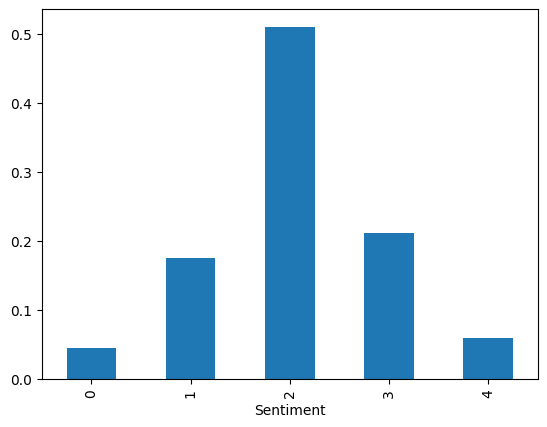

In [16]:
import matplotlib.pyplot as plt
raw_df.Sentiment.value_counts(normalize=True).sort_index().plot(kind = 'bar')

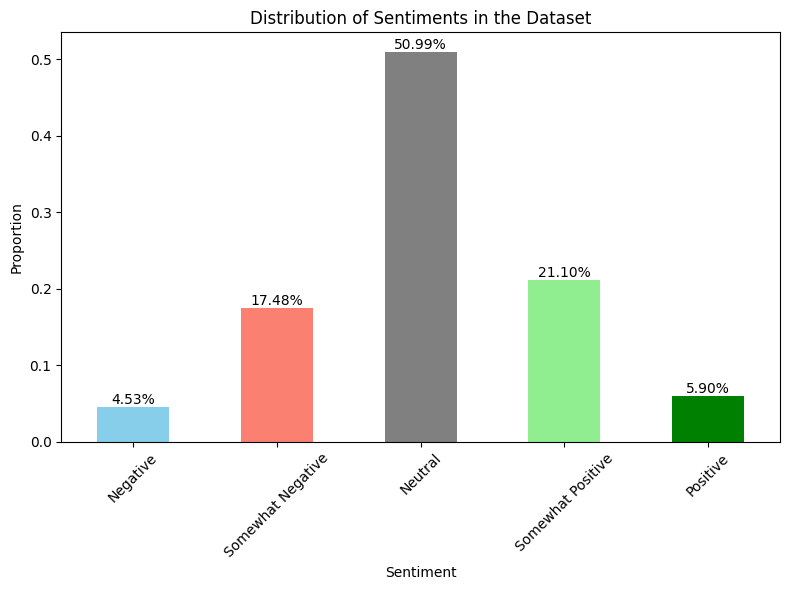

In [17]:
import matplotlib.pyplot as plt

# Define custom colors for each sentiment bar
colors = ['skyblue', 'salmon', 'gray', 'lightgreen', 'green']

# Define labels for x-axis
sentiment_labels = ['Negative', 'Somewhat Negative', 'Neutral', 'Somewhat Positive', 'Positive']

# Get the sentiment distribution
sentiment_counts = raw_df.Sentiment.value_counts(normalize=True).sort_index()

# Plot the bar chart
ax = sentiment_counts.plot(kind='bar', color=colors,
                           figsize=(8, 6))


# Set title and labels
ax.set_title('Distribution of Sentiments in the Dataset')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Proportion')
ax.set_xticks(range(len(sentiment_labels)))
ax.set_xticklabels(sentiment_labels, rotation=45)

# Show percentage values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


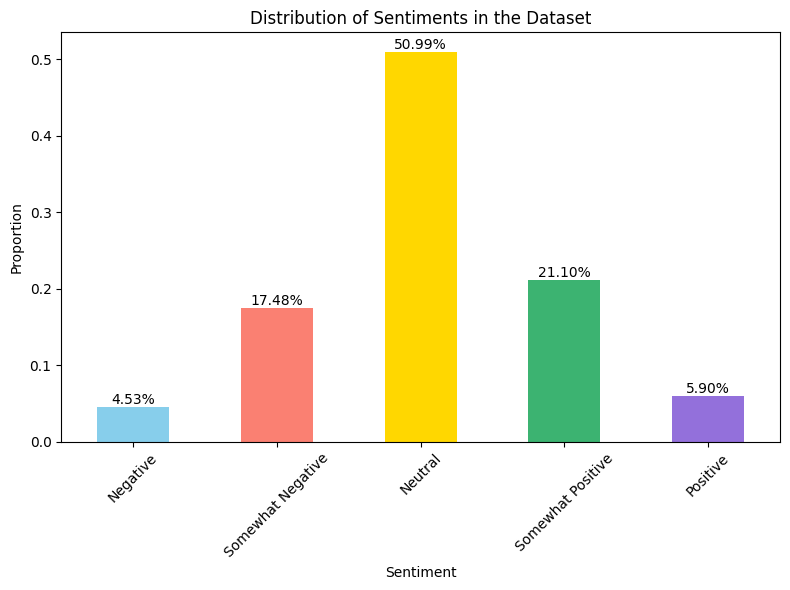

In [18]:
# Define custom colors for each sentiment bar
colors = ['skyblue', 'salmon', 'gold', 'mediumseagreen', 'mediumpurple']

# Plot
sentiment_counts = raw_df.Sentiment.value_counts(normalize=True).sort_index()
ax = sentiment_counts.plot(kind='bar', color=colors,
                           figsize=(8, 6))

# Add annotations with two decimal places
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Set titles and labels
ax.set_title('Distribution of Sentiments in the Dataset')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Proportion')
ax.set_xticks(range(5))
ax.set_xticklabels(['Negative', 'Somewhat Negative', 'Neutral', 'Somewhat Positive', 'Positive'], rotation=45)

plt.tight_layout()
plt.show()


### More Summary Insights

## 1. Average Phrase Length per Sentiment

<ipython-input-20-60dd1790d7cd>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=raw_df, x='Sentiment', y='Phrase_Length', palette='pastel')


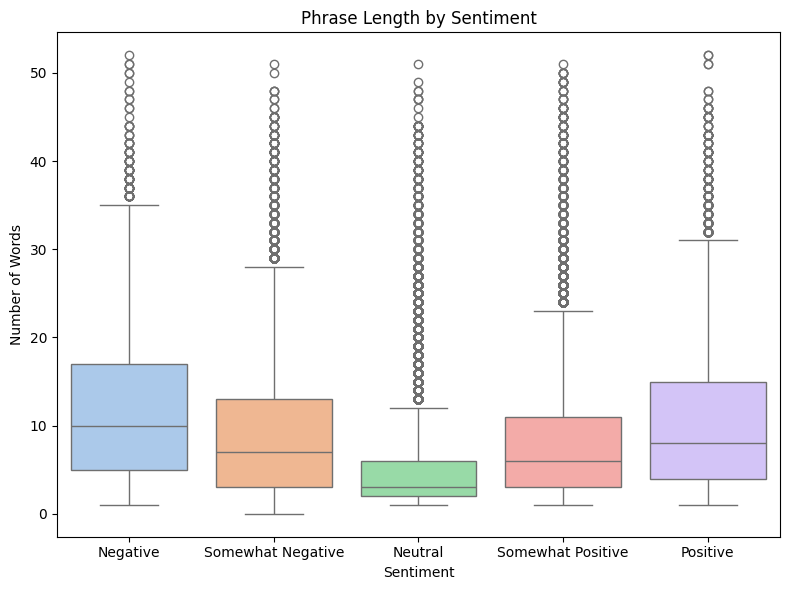

In [20]:
import pandas as pd
import seaborn as sns

# Add phrase length column
raw_df['Phrase_Length'] = raw_df['Phrase'].apply(lambda x: len(x.split()))

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=raw_df, x='Sentiment', y='Phrase_Length', palette='pastel')
plt.title('Phrase Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Words')
plt.xticks(ticks=range(5), labels=sentiment_labels)
plt.tight_layout()
plt.show()


In [21]:
raw_df.head()

,PhraseId,SentenceId,Phrase,Sentiment,Phrase_Length
0,1,1,A series of escapades demonstrating the adage ...,1,37
1,2,1,A series of escapades demonstrating the adage ...,2,14
2,3,1,A series,2,2
3,4,1,A,2,1
4,5,1,series,2,1


###  1. Descriptive Statistics Table

In [22]:
# Group by sentiment and describe phrase length
phrase_length_summary = raw_df.groupby('Sentiment')['Phrase_Length'].describe()
print(phrase_length_summary)


             count       mean       std  min  25%   50%   75%   max
Sentiment                                                          
0           7072.0  12.105345  8.755793  1.0  5.0  10.0  17.0  52.0
1          27273.0   9.112016  7.609619  0.0  3.0   7.0  13.0  51.0
2          79582.0   5.194617  5.348528  1.0  2.0   3.0   6.0  51.0
3          32927.0   8.446594  7.566081  1.0  3.0   6.0  11.0  51.0
4           9206.0  10.701390  8.493600  1.0  4.0   8.0  15.0  52.0


### 2. Box Plot of Phrase Length per Sentiment

<ipython-input-23-375aea3400dd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=raw_df, x='Sentiment', y='Phrase_Length', palette='Set2')


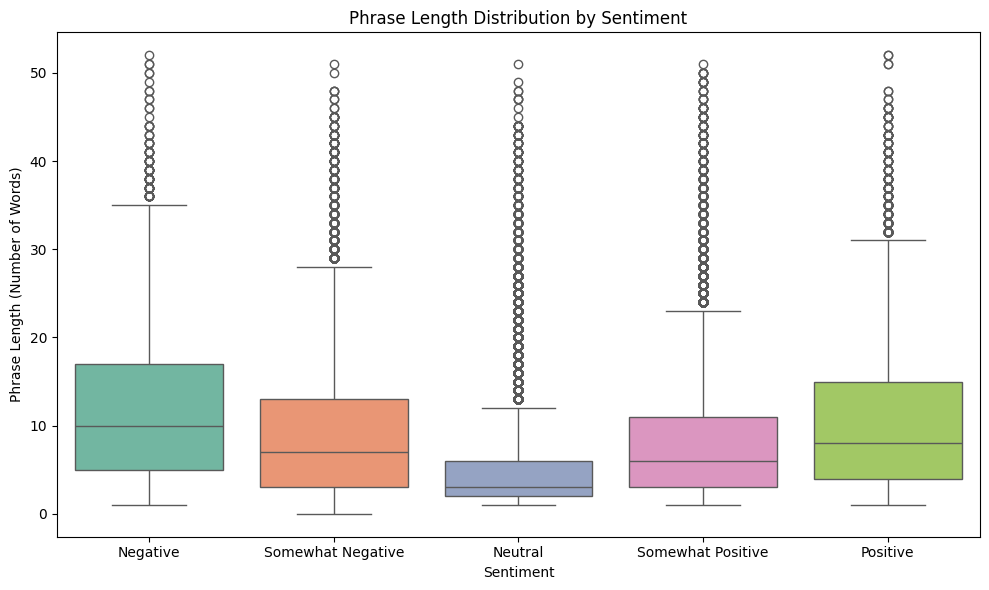

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=raw_df, x='Sentiment', y='Phrase_Length', palette='Set2')
plt.title('Phrase Length Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Phrase Length (Number of Words)')
plt.xticks(ticks=range(5), labels=['Negative', 'Somewhat Negative', 'Neutral', 'Somewhat Positive', 'Positive'])
plt.tight_layout()
plt.show()


### 3. Mean Phrase Length per Sentiment (Bar Chart)

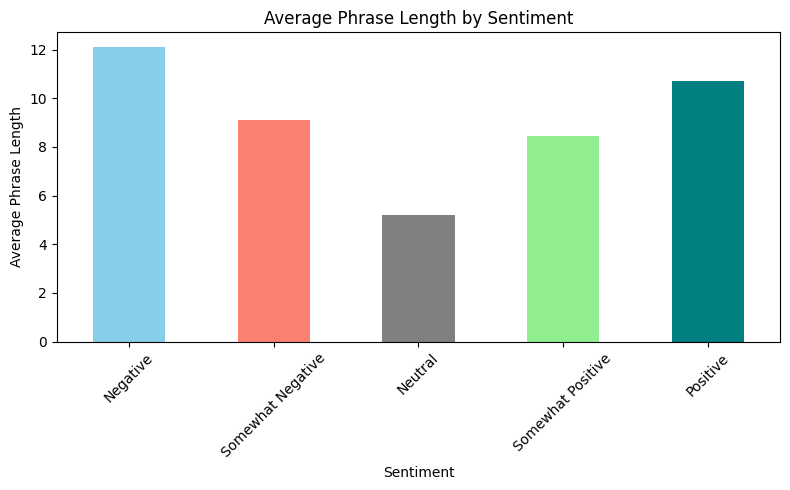

In [27]:
# Define custom colors for each sentiment
colors = ['skyblue', 'salmon', 'gray', 'lightgreen', 'teal']

# Compute mean phrase length per sentiment
mean_lengths = raw_df.groupby('Sentiment')['Phrase_Length'].mean()

# Plot with different colors
plt.figure(figsize=(8, 5))
mean_lengths.plot(kind='bar', color=colors)

# Customize plot
plt.title('Average Phrase Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Phrase Length')
plt.xticks(ticks=range(5), labels=['Negative', 'Somewhat Negative', 'Neutral', 'Somewhat Positive', 'Positive'], rotation=45)
plt.tight_layout()
plt.show()


### 4. Violin Plot

<ipython-input-29-049e3d232b96>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=raw_df, x='Sentiment', y='Phrase_Length', palette='Pastel1', inner='quartile')


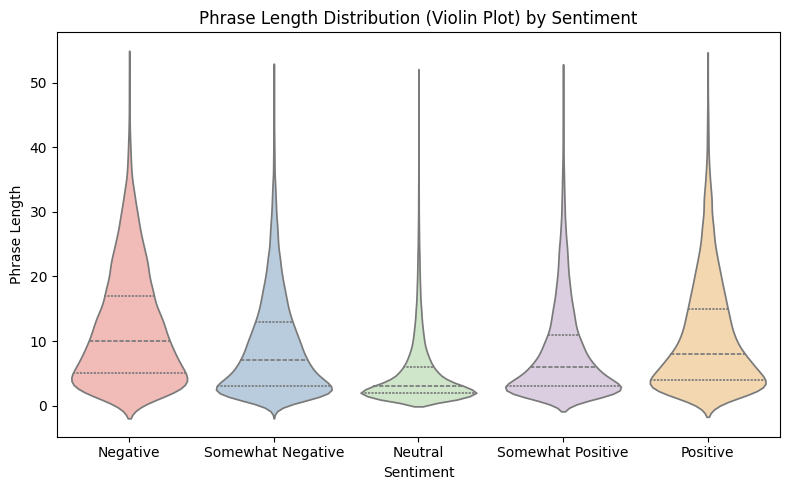

In [29]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=raw_df, x='Sentiment', y='Phrase_Length', palette='Pastel1', inner='quartile')
plt.title('Phrase Length Distribution (Violin Plot) by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Phrase Length')
plt.xticks(ticks=range(5), labels=['Negative', 'Somewhat Negative', 'Neutral', 'Somewhat Positive', 'Positive'])
plt.tight_layout()
plt.show()


##  2. Most Common Words per Sentiment

In [30]:
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def get_top_words(df, sentiment_label, n=10):
    words = ' '.join(df[df['Sentiment'] == sentiment_label]['Phrase']).lower().split()
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return Counter(words).most_common(n)

# Example: Top 10 words for each sentiment
for i in range(5):
    print(f"\nTop words for {sentiment_labels[i]}:")
    print(get_top_words(raw_df, i))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



Top words for Negative:
[('movie', 760), ('film', 480), ('bad', 434), ('like', 324), ('one', 284), ('characters', 167), ('comedy', 165), ('even', 164), ('minutes', 161), ('story', 153)]

Top words for Somewhat Negative:
[('movie', 1379), ('film', 1271), ('like', 913), ('one', 720), ('much', 594), ('story', 528), ('little', 490), ('characters', 455), ('bad', 427), ('even', 407)]

Top words for Neutral:
[('film', 2158), ('movie', 1894), ('one', 1283), ('like', 1110), ('story', 942), ('much', 695), ('time', 681), ('life', 647), ('characters', 614), ('movies', 571)]

Top words for Somewhat Positive:
[('film', 1844), ('movie', 1296), ('good', 859), ('one', 823), ('story', 661), ('funny', 629), ('like', 578), ('characters', 497), ('love', 491), ('comedy', 463)]

Top words for Positive:
[('film', 936), ('movie', 576), ('one', 499), ('best', 370), ('funny', 345), ('good', 289), ('performances', 253), ('story', 236), ('comedy', 231), ('great', 220)]


## 3. Word Cloud per Sentiment

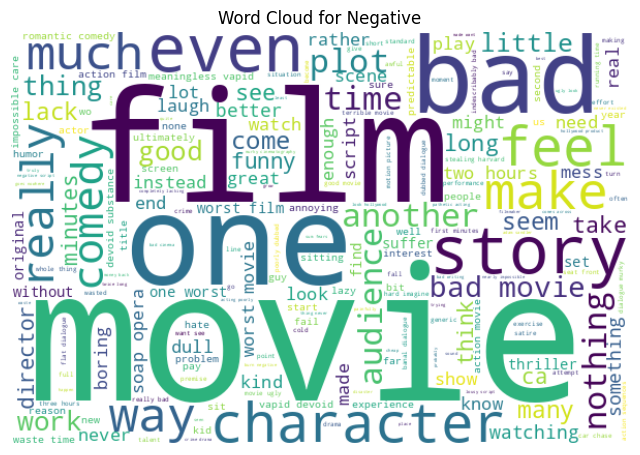

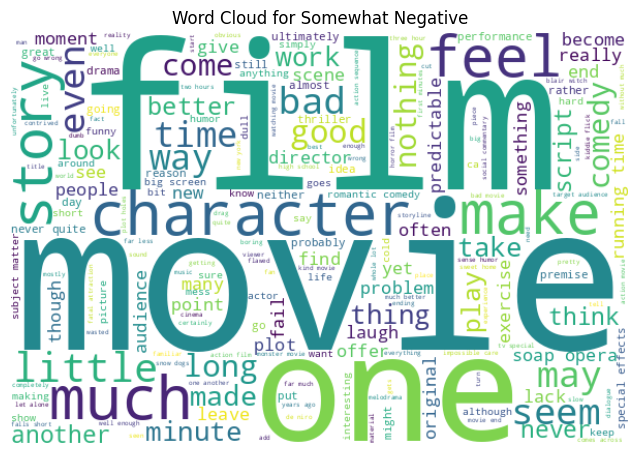

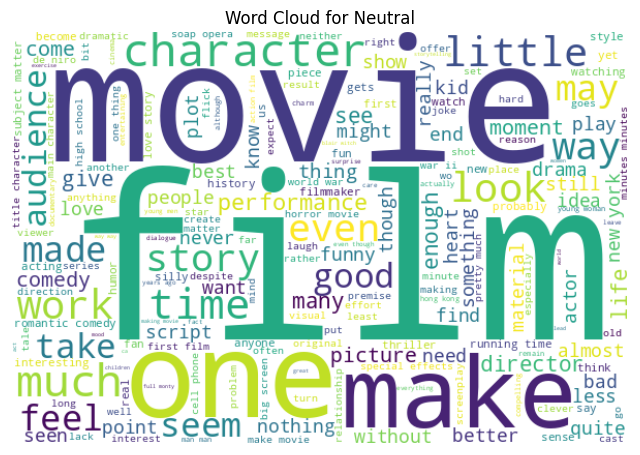

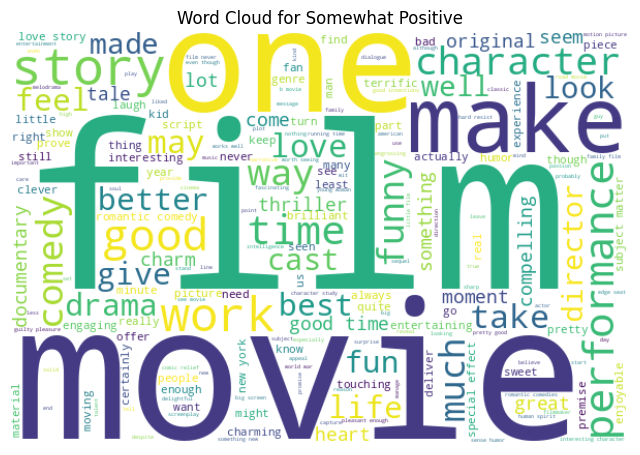

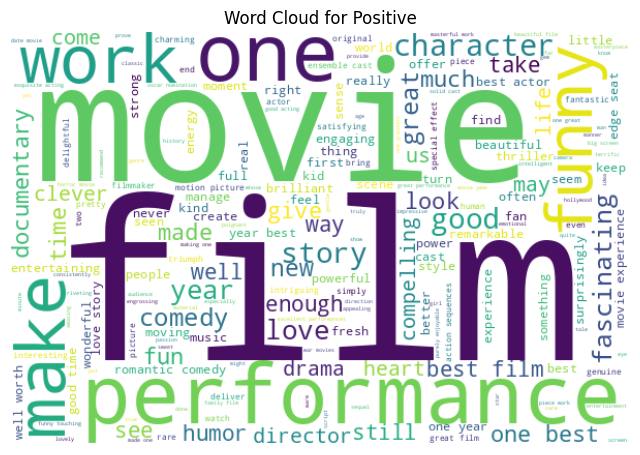

In [31]:
from wordcloud import WordCloud

for i in range(5):
    text = ' '.join(raw_df[raw_df['Sentiment'] == i]['Phrase']).lower()
    text = ' '.join([word for word in text.split() if word.isalpha() and word not in stop_words])
    wc = WordCloud(width=600, height=400, background_color='white').generate(text)

    plt.figure(figsize=(8, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment_labels[i]}")
    plt.show()


##  4. Phrase Count per Sentence

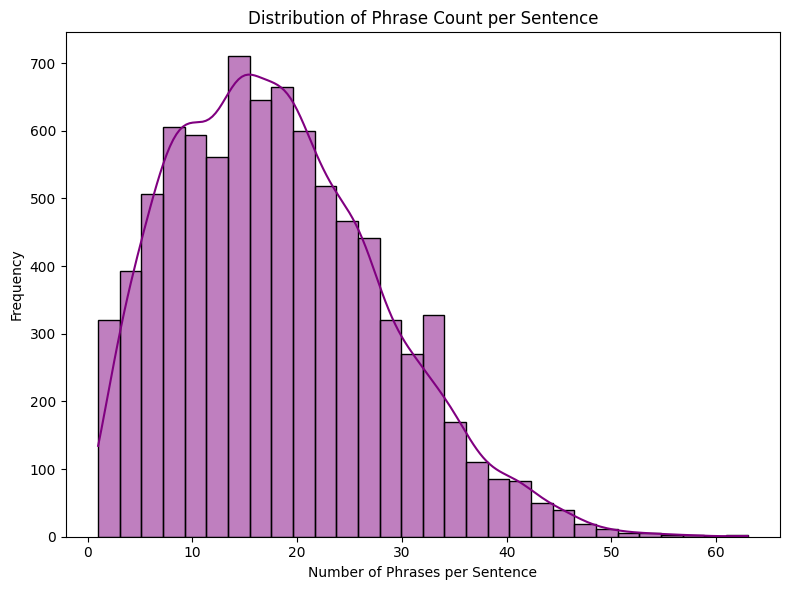

In [34]:
phrase_counts = raw_df.groupby('SentenceId')['PhraseId'].count()

plt.figure(figsize=(8, 6))
sns.histplot(phrase_counts, bins=30, kde=True, color='purple')
plt.title('Distribution of Phrase Count per Sentence')
plt.xlabel('Number of Phrases per Sentence')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


## 5. Sentiment Distribution by Sentence Length

<ipython-input-35-9588e868e02f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sent, x='LengthBin', y='AverageSentiment', palette='coolwarm')


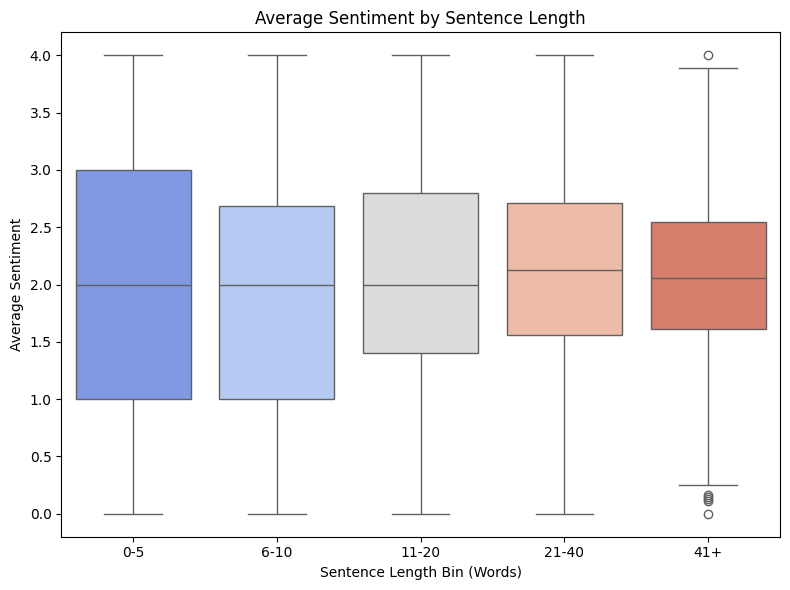

In [35]:
# Add sentence length per sentence
sentence_lengths = raw_df.groupby('SentenceId')['Phrase'].apply(lambda x: ' '.join(x)).apply(lambda x: len(x.split()))
sentiment_by_sentence = raw_df.groupby('SentenceId')['Sentiment'].mean()

df_sent = pd.DataFrame({'SentenceLength': sentence_lengths, 'AverageSentiment': sentiment_by_sentence})

# Bin sentence lengths
df_sent['LengthBin'] = pd.cut(df_sent['SentenceLength'], bins=[0, 5, 10, 20, 40, 100], labels=['0-5','6-10','11-20','21-40','41+'])

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_sent, x='LengthBin', y='AverageSentiment', palette='coolwarm')
plt.title('Average Sentiment by Sentence Length')
plt.xlabel('Sentence Length Bin (Words)')
plt.ylabel('Average Sentiment')
plt.tight_layout()
plt.show()


### Implenent TF-IDF Technique